In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dsdl
import numpy.random
from typing import Callable, List

%load_ext autoreload
%autoreload 2

In [2]:
DATASETS = ['a1a', 'mushrooms', 'a6a', 'w1a', 'w5a', 'ionosphere']
METHODS = ['SGD', 'AdaSpider', 'Spider', 'SpiderBoost', 'SVRG', 'AdaGrad', 'AdaSVRG']

# Logistic regression

In [3]:
from src.logistic_regression.log_reg_gradient import log_reg_gradient
from src.logistic_regression.sigmoid import sigmoid
from src.logistic_regression.stochastic_gradient import stochastic_gradient

In [55]:
def get_data(dataset_name: str):
    """
    :param dataset_name: Name of the dataset from dsdl module.
    :return: (X, y) train and target data.
    """
    ds = dsdl.load(dataset_name)
    X, y = ds.get_train()
    X = X.toarray()
    y = y.reshape(-1, 1)
    return X, y

def build_model(X, y):
    """
    Builds
    :param X: shape=(N, D). Train data
    :param y: shape=(N, 1). Target data
    :return: shape=(N, D+1). Built model for logistic regression.
    """
    return np.c_[np.ones((y.shape[0], 1)), X]

def get_initial_weights(tx):
    """
    Returns weights initialized from the uniform distribution [0, 1].
    :param tx: shape=(N, D). Build model
    :return: shape=(D, 1) Initial weights
    """
    np.random.seed(2022)
    return np.ones(shape=(tx.shape[1], 1))  # low=0, high=1,

def test_method(method: Optimizer,
                dataset_name: str,
                max_iter: int,
                *parameters) -> List:
        """
        :param method: Optimization method implementation from src optimizers module.
        :param dataset_name: Name of the dataset from dsdl module.
        :param max_iter: Number of iterations to test.
        :param parameters optional: Dataclass containing parameters used int optimization method.
        :return: List of gradients from optimization method.
        """
        X, y = get_data(dataset_name)
        tx = build_model(X, y)
        initial_weights = get_initial_weights(tx)

        gradients = method.optimize(initial_weights, tx, y, max_iter)
        return [np.linalg.norm(grad, 2) for grad in gradients]

In [56]:
from src.optimizers.SGD import SGD
from src.optimizers.AdaSpider import AdaSpider
from src.optimizers.Spider import Spider
from src.optimizers.SpiderBoost import SpiderBoost
from src.optimizers.SVRG import SVRG
from src.optimizers.AdaGrad import AdaGrad
from src.optimizers.AdaSVRG import AdaSVRG

In [85]:
ada_spider_gradients = test_method(ADASpider, 'a1a', 1000)
ada_spider_gradients = [np.linalg.norm(grad, 2) for grad in ada_spider_gradients]

### Plot

Dataset a1a
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG
Dataset mushrooms
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG
Dataset a6a
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG
Dataset w1a
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG
Dataset w5a
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG
Dataset ionosphere
Method SGD
Method Spider
Method SpiderBoost
Method AdaSVRG


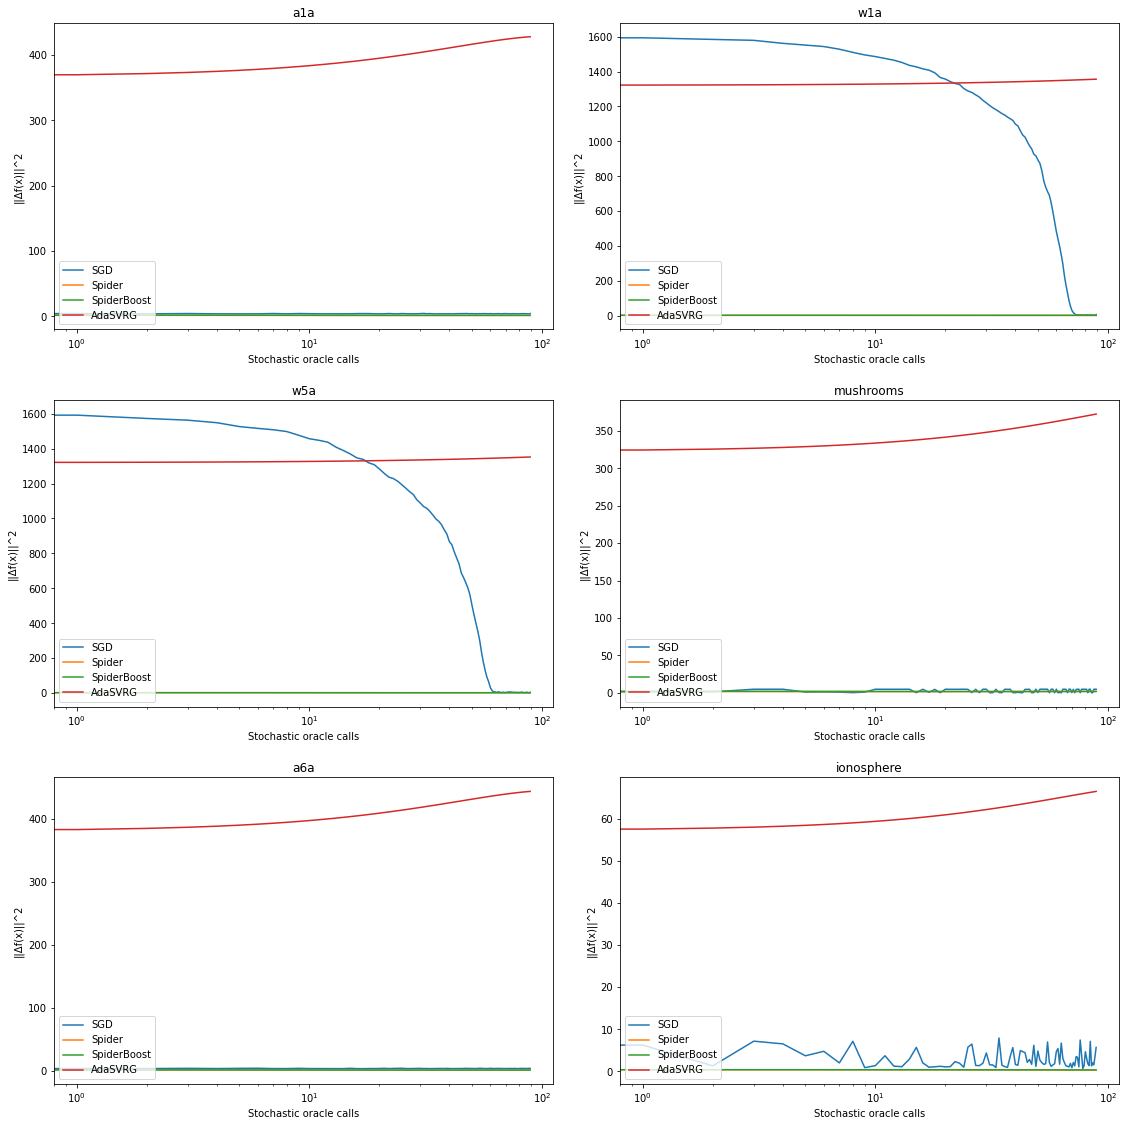

In [88]:
ITERATIONS = 1000

def plot_data():
    # Write your code to make 4x4 panel here
    X_LABEL = "Stochastic oracle calls"
    Y_LABEL = "||\u0394f(x)||^2"

    fig, ax = plt.subplots(3, 2, figsize=(16, 16), sharey=False, sharex=False)

    for i, dataset_name in enumerate(DATASETS):

        print("Dataset", dataset_name)
        sbplt = ax[i%3, i%2]

        for method in METHODS:
            print("Method", method.name)
            gradients = test_method(method, dataset_name, ITERATIONS)
            gradients = gradients[10:]  # ignore first gradient
            sbplt.plot(gradients, label=method.name)

        sbplt.set_xscale('log')
        sbplt.set_title(dataset_name)
        sbplt.set_xlabel(X_LABEL)
        sbplt.set_ylabel(Y_LABEL)
        sbplt.legend(loc='lower left')

        break  # plot single dataset

    fig.tight_layout(pad=2.0)
    fig.savefig('tests_logistic_regression.jpg', dpi=150)

plot_data()

In [65]:
# METHODS = ['AdaSpider', 'Spider']
# ITERATIONS = 100
#
# def plot_data():
#     # Write your code to make 4x4 panel here
#     X_LABEL = "Stochastic oracle calls"
#     Y_LABEL = "||\u0394f(x)||^2"
#
#     fig, ax = plt.subplots(3,2,figsize=(16,16), sharey=False, sharex=False)
#
#     for i, dataset_name in enumerate(DATASETS):
#         sbplt = ax[i%3, i%2]
#         print(dataset_name)
#         for method in METHODS:
#             if method == "Spider":
#                 spider_params = SpiderParam(100, 5, 0.05)
#                 gradients = test_method(Spider, dataset_name, ITERATIONS, spider_params)
#             else:
#                 gradients = test_method(ADASpider, dataset_name, ITERATIONS)
#             gradients = [np.linalg.norm(grad, 2) for grad in gradients]
#             sbplt.plot(gradients, label=method)
#
#         sbplt.set_xscale('log')
#         sbplt.set_title(dataset_name)
#         sbplt.set_xlabel(X_LABEL)
#         sbplt.set_ylabel(Y_LABEL)
#         sbplt.legend(loc='lower left')
#
#         break  # plot single dataset
#
#     fig.tight_layout(pad=2.0)
#     # fig.savefig('tests_logistic_regression.jpg', dpi=150)
#
# plot_data()